In [23]:
#imports

import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords, wordnet

from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression

# Description
After all my modeling I thought it might be intersting to see if there were ways to predict whether a posts would be removed by the moderator. Here I got through snowboarding, didn't have time to do a similar analysis with skiing.  

In [2]:
df=pd.read_csv('../data/snowboard_removed.csv', na_filter=False)
df.head()

,Unnamed: 0,subreddit,selftext,title
0,0,snowboarding,,Simple slow run. :)
1,1,snowboarding,,Made a mini snowboard on my 3d printer
2,2,snowboarding,[removed],Advise for a Snowboard to Buy
3,3,snowboarding,,Here are the brackets for NST at Revelstoke. W...
4,4,snowboarding,[removed],How to fall on boxes and rails?


In [3]:
df.shape

(4856, 4)

In [4]:
df=df.drop(columns='Unnamed: 0')
df.head(30)

,subreddit,selftext,title
0,snowboarding,,Simple slow run. :)
1,snowboarding,,Made a mini snowboard on my 3d printer
2,snowboarding,[removed],Advise for a Snowboard to Buy
3,snowboarding,,Here are the brackets for NST at Revelstoke. W...
4,snowboarding,[removed],How to fall on boxes and rails?
5,snowboarding,,Got my board back like this after waxing by sp...
6,snowboarding,[removed],Arbitrum Introduces Token. 03.03.2023.
7,snowboarding,,Hotspots from Burton Photon Boa boots. Using c...
8,snowboarding,,KaPOW!
9,snowboarding,,It ain’t much but I finally got it down!


In [5]:
df['removed'] =df['selftext'].map({'[removed]': 1})
df['removed']= df['removed'].replace(np.nan, 0)
df.head()

,subreddit,selftext,title,removed
0,snowboarding,,Simple slow run. :),0.0
1,snowboarding,,Made a mini snowboard on my 3d printer,0.0
2,snowboarding,[removed],Advise for a Snowboard to Buy,1.0
3,snowboarding,,Here are the brackets for NST at Revelstoke. W...,0.0
4,snowboarding,[removed],How to fall on boxes and rails?,1.0


In [6]:
df['selftext']= df['selftext'].replace('[removed]', '')
df.head(16)

,subreddit,selftext,title,removed
0,snowboarding,,Simple slow run. :),0.0
1,snowboarding,,Made a mini snowboard on my 3d printer,0.0
2,snowboarding,,Advise for a Snowboard to Buy,1.0
3,snowboarding,,Here are the brackets for NST at Revelstoke. W...,0.0
4,snowboarding,,How to fall on boxes and rails?,1.0
5,snowboarding,,Got my board back like this after waxing by sp...,0.0
6,snowboarding,,Arbitrum Introduces Token. 03.03.2023.,1.0
7,snowboarding,,Hotspots from Burton Photon Boa boots. Using c...,0.0
8,snowboarding,,KaPOW!,0.0
9,snowboarding,,It ain’t much but I finally got it down!,0.0


In [7]:
df['text']= df['selftext']+ ' '+ df['title']
df.head(30)

,subreddit,selftext,title,removed,text
0,snowboarding,,Simple slow run. :),0.0,Simple slow run. :)
1,snowboarding,,Made a mini snowboard on my 3d printer,0.0,Made a mini snowboard on my 3d printer
2,snowboarding,,Advise for a Snowboard to Buy,1.0,Advise for a Snowboard to Buy
3,snowboarding,,Here are the brackets for NST at Revelstoke. W...,0.0,Here are the brackets for NST at Revelstoke. ...
4,snowboarding,,How to fall on boxes and rails?,1.0,How to fall on boxes and rails?
5,snowboarding,,Got my board back like this after waxing by sp...,0.0,Got my board back like this after waxing by s...
6,snowboarding,,Arbitrum Introduces Token. 03.03.2023.,1.0,Arbitrum Introduces Token. 03.03.2023.
7,snowboarding,,Hotspots from Burton Photon Boa boots. Using c...,0.0,Hotspots from Burton Photon Boa boots. Using ...
8,snowboarding,,KaPOW!,0.0,KaPOW!
9,snowboarding,,It ain’t much but I finally got it down!,0.0,It ain’t much but I finally got it down!


In [8]:
df=df.drop(columns=['selftext', 'title'])

In [9]:
df.head()

,subreddit,removed,text
0,snowboarding,0.0,Simple slow run. :)
1,snowboarding,0.0,Made a mini snowboard on my 3d printer
2,snowboarding,1.0,Advise for a Snowboard to Buy
3,snowboarding,0.0,Here are the brackets for NST at Revelstoke. ...
4,snowboarding,1.0,How to fall on boxes and rails?


In [10]:
removed=df[df['removed']==1].copy()
removed

,subreddit,removed,text
2,snowboarding,1.0,Advise for a Snowboard to Buy
4,snowboarding,1.0,How to fall on boxes and rails?
6,snowboarding,1.0,Arbitrum Introduces Token. 03.03.2023.
13,snowboarding,1.0,Noob here. Does anyone else here enjoy boards...
17,snowboarding,1.0,Arbitrum's Token Released. 03.03.2023.
...,...,...,...
4846,snowboarding,1.0,Snowboard Sizing
4848,snowboarding,1.0,Edge Angle advice please ?
4849,snowboarding,1.0,Mammoth Mountain Discount?
4851,snowboarding,1.0,Wanna get into snoeboarding but dunno how.


# hindsight is 20-20.  
I got rid of the removed column early on in my cleaning... so here I have to redo it to include that column.  

In [11]:
X=removed['text']

In [12]:
cvec = CountVectorizer(stop_words='english')

In [13]:
cvec.fit(X)

CountVectorizer(stop_words='english')

In [14]:
X = cvec.transform(X)

In [15]:
X.shape

(2004, 2614)

In [16]:
X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 2, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [17]:
X = pd.DataFrame(X.todense(), 
                          columns=cvec.get_feature_names())

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


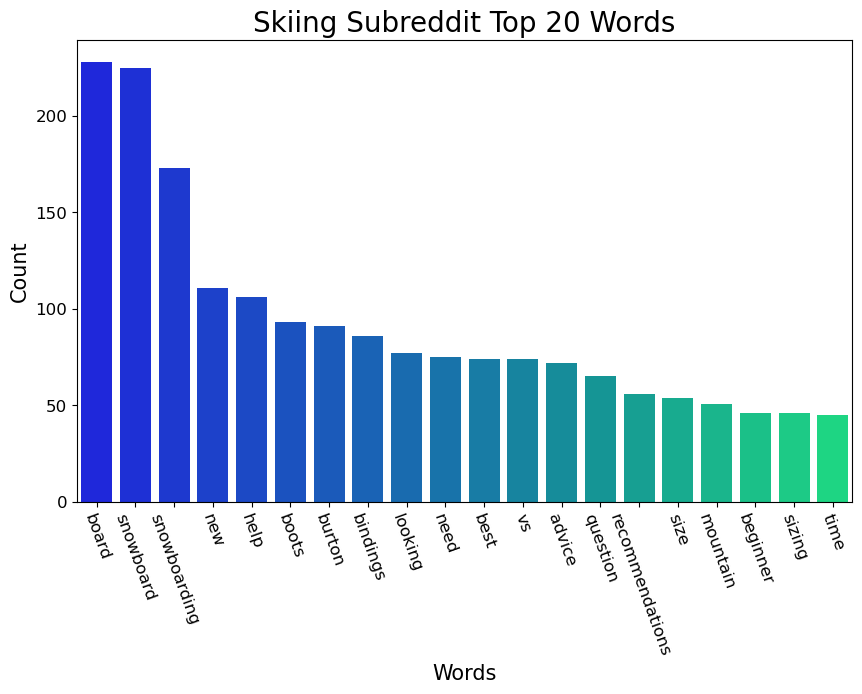

In [20]:
plt.figure(figsize=(10,6))
ski_top_20 = pd.DataFrame(X.sum().sort_values(ascending = False).head(20), columns=['count'])


sns.barplot(ski_top_20.index, 'count', data=ski_top_20, palette='winter')
plt.title('Skiing Subreddit Top 20 Words', fontsize=20)
plt.xlabel('Words', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.tick_params(labelsize=12)
plt.xticks(rotation=-70);

# Lots of stopwords and words with ski/snowboard. Lets get rid of those. 

In [21]:
df.head()

,subreddit,removed,text
0,snowboarding,0.0,Simple slow run. :)
1,snowboarding,0.0,Made a mini snowboard on my 3d printer
2,snowboarding,1.0,Advise for a Snowboard to Buy
3,snowboarding,0.0,Here are the brackets for NST at Revelstoke. ...
4,snowboarding,1.0,How to fall on boxes and rails?


In [24]:
tokenizer=RegexpTokenizer('\w+')
df['tokenized']=[tokenizer.tokenize(text.lower()) for text in df['text']]
#keeps it in a dataframe
df.head()

,subreddit,removed,text,tokenized
0,snowboarding,0.0,Simple slow run. :),"[simple, slow, run]"
1,snowboarding,0.0,Made a mini snowboard on my 3d printer,"[made, a, mini, snowboard, on, my, 3d, printer]"
2,snowboarding,1.0,Advise for a Snowboard to Buy,"[advise, for, a, snowboard, to, buy]"
3,snowboarding,0.0,Here are the brackets for NST at Revelstoke. ...,"[here, are, the, brackets, for, nst, at, revel..."
4,snowboarding,1.0,How to fall on boxes and rails?,"[how, to, fall, on, boxes, and, rails]"


In [25]:
stopwords = stopwords.words("english")

In [26]:
stopwords.extend(('ski', 'skiing', 'skis','board', 'snowboarding', 'snowboards', 'snowboard', 'snowboarders', 'snowboarder', 'boards', 'board', 'boarding'))

In [27]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
def remove_stopwords(text):
    free_of_sw = []

    for i in text:
        if i not in stopwords:
            free_of_sw.append(i)

    return(' '.join(free_of_sw))

df['no_stopwords'] = df['tokenized'].apply(remove_stopwords)
df.head(10)


#https://stackoverflow.com/questions/62234522/removing-stop-words-and-selecting-only-names-in-pandas

,subreddit,removed,text,tokenized,no_stopwords
0,snowboarding,0.0,Simple slow run. :),"[simple, slow, run]",simple slow run
1,snowboarding,0.0,Made a mini snowboard on my 3d printer,"[made, a, mini, snowboard, on, my, 3d, printer]",made mini 3d printer
2,snowboarding,1.0,Advise for a Snowboard to Buy,"[advise, for, a, snowboard, to, buy]",advise buy
3,snowboarding,0.0,Here are the brackets for NST at Revelstoke. ...,"[here, are, the, brackets, for, nst, at, revel...",brackets nst revelstoke think matchups
4,snowboarding,1.0,How to fall on boxes and rails?,"[how, to, fall, on, boxes, and, rails]",fall boxes rails
5,snowboarding,0.0,Got my board back like this after waxing by s...,"[got, my, board, back, like, this, after, waxi...",got back like waxing specialists said producti...
6,snowboarding,1.0,Arbitrum Introduces Token. 03.03.2023.,"[arbitrum, introduces, token, 03, 03, 2023]",arbitrum introduces token 03 03 2023
7,snowboarding,0.0,Hotspots from Burton Photon Boa boots. Using ...,"[hotspots, from, burton, photon, boa, boots, u...",hotspots burton photon boa boots using compete...
8,snowboarding,0.0,KaPOW!,[kapow],kapow
9,snowboarding,0.0,It ain’t much but I finally got it down!,"[it, ain, t, much, but, i, finally, got, it, d...",much finally got


In [29]:
df.head()

,subreddit,removed,text,tokenized,no_stopwords
0,snowboarding,0.0,Simple slow run. :),"[simple, slow, run]",simple slow run
1,snowboarding,0.0,Made a mini snowboard on my 3d printer,"[made, a, mini, snowboard, on, my, 3d, printer]",made mini 3d printer
2,snowboarding,1.0,Advise for a Snowboard to Buy,"[advise, for, a, snowboard, to, buy]",advise buy
3,snowboarding,0.0,Here are the brackets for NST at Revelstoke. ...,"[here, are, the, brackets, for, nst, at, revel...",brackets nst revelstoke think matchups
4,snowboarding,1.0,How to fall on boxes and rails?,"[how, to, fall, on, boxes, and, rails]",fall boxes rails


In [30]:
def stem_words(tokens):
    ps=PorterStemmer()
    clause=', '.join([ps.stem(token) for token in tokens])
    return clause.replace(",", "")

#tim and Katie

In [31]:
df['stemmed']=df['tokenized'].apply(stem_words)
df.head()

,subreddit,removed,text,tokenized,no_stopwords,stemmed
0,snowboarding,0.0,Simple slow run. :),"[simple, slow, run]",simple slow run,simpl slow run
1,snowboarding,0.0,Made a mini snowboard on my 3d printer,"[made, a, mini, snowboard, on, my, 3d, printer]",made mini 3d printer,made a mini snowboard on my 3d printer
2,snowboarding,1.0,Advise for a Snowboard to Buy,"[advise, for, a, snowboard, to, buy]",advise buy,advis for a snowboard to buy
3,snowboarding,0.0,Here are the brackets for NST at Revelstoke. ...,"[here, are, the, brackets, for, nst, at, revel...",brackets nst revelstoke think matchups,here are the bracket for nst at revelstok what...
4,snowboarding,1.0,How to fall on boxes and rails?,"[how, to, fall, on, boxes, and, rails]",fall boxes rails,how to fall on box and rail


# Exploring trends in snowboard post that were removed posts

In [32]:
X = df['text']
y = df['removed']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=23)

In [34]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [35]:
pipe.get_params()

{'memory': None,
 'steps': [('tvec', TfidfVectorizer()), ('nb', MultinomialNB())],
 'verbose': False,
 'tvec': TfidfVectorizer(),
 'nb': MultinomialNB(),
 'tvec__analyzer': 'word',
 'tvec__binary': False,
 'tvec__decode_error': 'strict',
 'tvec__dtype': numpy.float64,
 'tvec__encoding': 'utf-8',
 'tvec__input': 'content',
 'tvec__lowercase': True,
 'tvec__max_df': 1.0,
 'tvec__max_features': None,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1),
 'tvec__norm': 'l2',
 'tvec__preprocessor': None,
 'tvec__smooth_idf': True,
 'tvec__stop_words': None,
 'tvec__strip_accents': None,
 'tvec__sublinear_tf': False,
 'tvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tvec__tokenizer': None,
 'tvec__use_idf': True,
 'tvec__vocabulary': None,
 'nb__alpha': 1.0,
 'nb__class_prior': None,
 'nb__fit_prior': True}

In [36]:
pipe_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'tvec__ngram_range': [(1, 1), (1, 2)]
}

In [37]:
gs = GridSearchCV(pipe, 
                  param_grid = pipe_params, 
                  cv = 5) 

In [38]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [39]:
gs.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 3000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

In [40]:
# trying again because we were hitting the extreme end of our ranges
pipe_params2 = {
    'tvec__max_features': [500, 1_000, 2_000],
    'tvec__min_df': [3, 4],
    'tvec__max_df': [.8, .9],
    'tvec__ngram_range': [(1, 2)]
}

In [41]:
gs = GridSearchCV(pipe, 
                  param_grid = pipe_params2, 
                  cv = 5) 

In [42]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_df': [0.8, 0.9],
                         'tvec__max_features': [500, 1000, 2000],
                         'tvec__min_df': [3, 4],
                         'tvec__ngram_range': [(1, 2)]})

In [43]:
gs.best_params_

{'tvec__max_df': 0.8,
 'tvec__max_features': 2000,
 'tvec__min_df': 3,
 'tvec__ngram_range': (1, 2)}

In [44]:
gs.score(X_train, y_train)

0.8242723778143877

In [45]:
gs.score(X_test, y_test)

0.7767710049423394

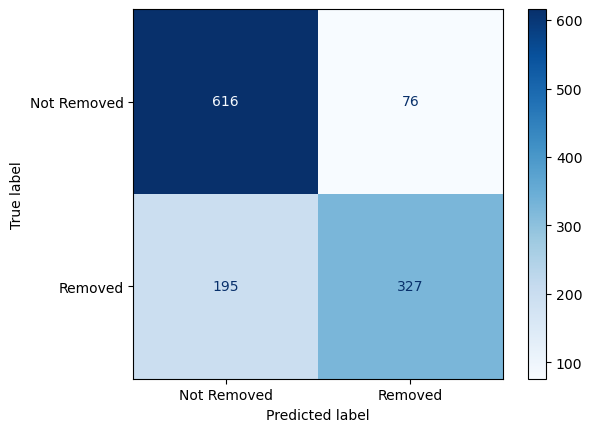

In [46]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test, cmap="Blues", display_labels=('Not Removed', 'Removed'))

In [47]:
preds = gs.predict(X_test)

In [48]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [49]:
spec = tn / (tn + fp)

sens = tp / (tp + fn)

acc = (tp+tn) / (tp + tn+ fn+fp)

prec = tp/ (tp+fp)

print(f'Specificity: {spec}')

print(f'Sensativity: {sens}')

print(f'Accuracy: {acc}')

print(f'Precision: {prec}')

Specificity: 0.8901734104046243
Sensativity: 0.6264367816091954
Accuracy: 0.7767710049423394
Precision: 0.8114143920595533


# logreg on removed, so we can get the inference

In [50]:
df_logreg=df.copy()

In [51]:
df_logreg.shape

(4856, 6)

In [52]:
X=df_logreg['text']
y=df_logreg['removed']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=23)

In [54]:
cvec =  CountVectorizer()

Z_train = cvec.fit_transform(X_train)
Z_test = cvec.transform(X_test)

In [55]:

logreg = LogisticRegression()
logreg.fit(Z_train,y_train)


LogisticRegression()

In [56]:
logreg.score(Z_train,y_train)


0.9442613948380011

In [57]:
logreg.score(Z_test,y_test)

0.78500823723229

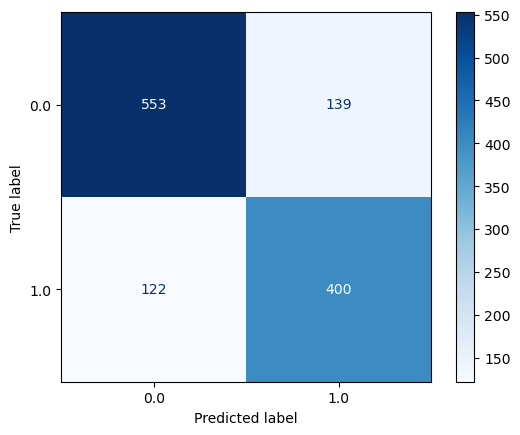

In [58]:
ConfusionMatrixDisplay.from_estimator(logreg, Z_test, y_test, cmap="Blues")

In [59]:
preds = logreg.predict(Z_test)

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [60]:
spec = tn / (tn + fp)

sens = tp / (tp + fn)

acc = (tp+tn) / (tp + tn+ fn+fp)

prec = tp/ (tp+fp)

print(f'Specificity: {spec}')

print(f'Sensativity: {sens}')

print(f'Accuracy: {acc}')

print(f'Precision: {prec}')

Specificity: 0.7991329479768786
Sensativity: 0.7662835249042146
Accuracy: 0.78500823723229
Precision: 0.7421150278293135


# inference on Text

In [61]:
logreg.coef_

array([[-0.72835752,  0.17764782,  0.47146096, ...,  0.02603525,
        -0.25117031, -0.00337054]])

In [62]:
logreg.intercept_

array([0.37383272])

In [63]:
cvec.get_feature_names_out()

array(['01', '02', '03', ..., 'zone', 'zones', 'zujtu9'], dtype=object)

In [64]:
fm_df=pd.DataFrame({'feature' : cvec.get_feature_names(), 'coef' : logreg.coef_[0]}).sort_values(by='coef', ascending=False)
fm_df.head()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature,coef
3826,question,2.024319
3495,pain,1.727136
4667,step,1.371862
3899,recommendations,1.346866
376,airdrop,1.280135


In [65]:
fm_df['weight']=np.exp(fm_df['coef'])

In [66]:
fm_df.head()

,feature,coef,weight
3826,question,2.024319,7.570955
3495,pain,1.727136,5.624524
4667,step,1.371862,3.942686
3899,recommendations,1.346866,3.845356
376,airdrop,1.280135,3.597125


In [67]:
fm_plot=fm_df.head(15).copy()

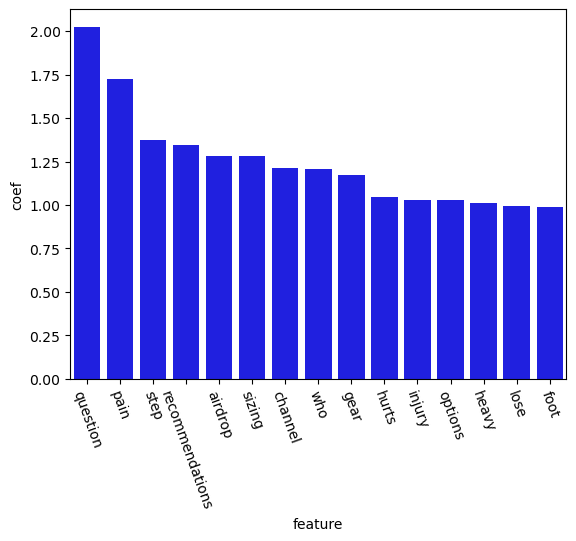

In [68]:
sns.barplot(x=fm_plot['feature'], y=fm_plot['coef'], color='blue')
plt.xticks(rotation=-70);

# Does the seniment of a post impact if it's removed
(ran out of time) 

In [69]:
sent=df.copy()

In [70]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
sent['rating'] = sent['text'].apply(analyzer.polarity_scores)
pd.concat([sent.drop(['rating'], axis=1), sent['rating'].apply(pd.Series)], axis=1)

# https://stackoverflow.com/questions/61608057/output-vader-sentiment-scores-in-columns-based-on-dataframe-rows-of-tweets

,subreddit,removed,text,tokenized,no_stopwords,stemmed,neg,neu,pos,compound
0,snowboarding,0.0,Simple slow run. :),"[simple, slow, run]",simple slow run,simpl slow run,0.000,0.500,0.500,0.4588
1,snowboarding,0.0,Made a mini snowboard on my 3d printer,"[made, a, mini, snowboard, on, my, 3d, printer]",made mini 3d printer,made a mini snowboard on my 3d printer,0.000,1.000,0.000,0.0000
2,snowboarding,1.0,Advise for a Snowboard to Buy,"[advise, for, a, snowboard, to, buy]",advise buy,advis for a snowboard to buy,0.000,1.000,0.000,0.0000
3,snowboarding,0.0,Here are the brackets for NST at Revelstoke. ...,"[here, are, the, brackets, for, nst, at, revel...",brackets nst revelstoke think matchups,here are the bracket for nst at revelstok what...,0.000,1.000,0.000,0.0000
4,snowboarding,1.0,How to fall on boxes and rails?,"[how, to, fall, on, boxes, and, rails]",fall boxes rails,how to fall on box and rail,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
4851,snowboarding,1.0,Wanna get into snoeboarding but dunno how.,"[wanna, get, into, snoeboarding, but, dunno, how]",wanna get snoeboarding dunno,wanna get into snoeboard but dunno how,0.000,1.000,0.000,0.0000
4852,snowboarding,0.0,Did I damage my snowboard base?,"[did, i, damage, my, snowboard, base]",damage base,did i damag my snowboard base,0.444,0.556,0.000,-0.4939
4853,snowboarding,0.0,Snowboarding IRL streams every Saturday aroun...,"[snowboarding, irl, streams, every, saturday, ...",irl streams every saturday around 9am mst twit...,snowboard irl stream everi saturday around 9am...,0.000,1.000,0.000,0.0000
4854,snowboarding,0.0,Snowboarders in Hell,"[snowboarders, in, hell]",hell,snowboard in hell,0.697,0.303,0.000,-0.6808


In [71]:
sent.head()

,subreddit,removed,text,tokenized,no_stopwords,stemmed,rating
0,snowboarding,0.0,Simple slow run. :),"[simple, slow, run]",simple slow run,simpl slow run,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound..."
1,snowboarding,0.0,Made a mini snowboard on my 3d printer,"[made, a, mini, snowboard, on, my, 3d, printer]",made mini 3d printer,made a mini snowboard on my 3d printer,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,snowboarding,1.0,Advise for a Snowboard to Buy,"[advise, for, a, snowboard, to, buy]",advise buy,advis for a snowboard to buy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,snowboarding,0.0,Here are the brackets for NST at Revelstoke. ...,"[here, are, the, brackets, for, nst, at, revel...",brackets nst revelstoke think matchups,here are the bracket for nst at revelstok what...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,snowboarding,1.0,How to fall on boxes and rails?,"[how, to, fall, on, boxes, and, rails]",fall boxes rails,how to fall on box and rail,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [72]:
def unpack(df, column, fillna=None):
    ret = None
    if fillna is None:
        ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems()))], axis=1)
        del ret[column]
    else:
        ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems())).fillna(fillna)], axis=1)
        del ret[column]
    return ret

sent = unpack(sent, 'rating', 0)
sent.head()

,subreddit,removed,text,tokenized,no_stopwords,stemmed,neg,neu,pos,compound
0,snowboarding,0.0,Simple slow run. :),"[simple, slow, run]",simple slow run,simpl slow run,0.0,0.5,0.5,0.4588
1,snowboarding,0.0,Made a mini snowboard on my 3d printer,"[made, a, mini, snowboard, on, my, 3d, printer]",made mini 3d printer,made a mini snowboard on my 3d printer,0.0,1.0,0.0,0.0000
2,snowboarding,1.0,Advise for a Snowboard to Buy,"[advise, for, a, snowboard, to, buy]",advise buy,advis for a snowboard to buy,0.0,1.0,0.0,0.0000
3,snowboarding,0.0,Here are the brackets for NST at Revelstoke. ...,"[here, are, the, brackets, for, nst, at, revel...",brackets nst revelstoke think matchups,here are the bracket for nst at revelstok what...,0.0,1.0,0.0,0.0000
4,snowboarding,1.0,How to fall on boxes and rails?,"[how, to, fall, on, boxes, and, rails]",fall boxes rails,how to fall on box and rail,0.0,1.0,0.0,0.0000
